# 80 Cereals Government Recommendations
Based on the US Governments Dietary Guidelinesâ€™ Executive Summary, recommend 5 cereals that meet those guidelines.

    Plot at least 3 data visualizations to help communicate your recommendations.
    Feel free to use common Python packages such as [numpy](https://numpy.org/) as needed.
    Briefly explain your thought process for processing the data and determining the recommended cereals in the comments.

# Set up

In [1]:
%pip install seaborn

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sn
from scipy import stats
#import opendatasets as od
#%matplotlib inline

In [3]:
#Load data from cereal.csv on google drive to a pandas dataframe
cereal_data = pd.read_csv('cereal.csv')

# Data
Let's first take a look at the data

In [4]:
print("The first 5 rows of data are:\n")
print(cereal_data.head)
print("\n\nDataset has {} rows and {} columns".format(cereal_data.shape[0], cereal_data.shape[1]))
print("\n\nDatatype: \n")
print(cereal_data.dtypes)
print("\n\nThe number of null values for each column are: \n")
print(cereal_data.isnull().sum())
print("\n\nData summary: \n")
print(cereal_data.describe())

The first 5 rows of data are:

<bound method NDFrame.head of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110

In [5]:
# Go through dataframe and replace -1 values with 0
cereal_data = cereal_data.replace(-1,0)

# Recommendation Reasoning
We are assuming here that these recommendations are for an average grown adult.

According to [Goverment Dietary Guidelines](https://www.dietaryguidelines.gov/resources/2020-2025-dietary-guidelines-online-materials/top-10-things-you-need-know-about-dietary), there are 10 things Americans need to know about the dietary guidelines. The information presented in these 10 things contain four overarching guidelines, four key recommendations, and many figures representing  the changes most Americans need to make to meet these guidelines.

Because we are dealing with the nutritional data of cereal, only a few key points mentioned are relevant to the cereal recommendations in this notebook. I've read through the recommendations and pasted all relevant lines below. In short, we are looking for nutritionally dense foods, and to cut down on sugars, saturated fats, and sodium.


    Follow a healthy dietary pattern at every life stage.  
    Customize and enjoy nutrient-dense food and beverage choices to reflect personal preferences, cultural traditions, and budgetary considerations.
    Focus on meeting food group needs with nutrient-dense foods and beverages, and stay within calorie limits.
    Limit foods and beverages higher in added sugars, saturated fat, and sodium, and limit alcoholic beverages.

    Making choices rich in nutrients should be the first choice. There is very little leeway for extra calories from added sugars, saturated fats, and if consumed, alcohol. Most of the calories a person eats each day (~85%) are needed for foods rich in nutrients that help the person meet food group recommendations. Only a small amount of calories (~15%) are left over for added sugars, saturated fat, and, (if consumed) alcohol.


First, I am finding cereals with the lowest amounts of sugars, sodium, and saturated fats per (SERVING? CALORIE?!)

In [ ]:
#cereals lowest in sodium
cereal_data.sort_values('sodium').head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
60,Raisin Squares,K,C,90,2,0,0,2.0,15.0,6,110,25,3,1.00,0.50,55.333142
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,0.0,0,110,0,1,1.00,0.67,50.828392
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679


In [ ]:
#cereals lowest in sugar
cereal_data.sort_values('sugars').head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,0,0,2,1.00,1.00,64.533816
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,0.0,0,110,0,1,1.00,0.67,50.828392
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999
61,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,30,25,1,1.00,1.13,41.998933


In [ ]:
#cereals lowest in fat
cereal_data.sort_values('fat').head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,0,0,2,1.0,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.0,0.80,58.345141
25,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973
60,Raisin Squares,K,C,90,2,0,0,2.0,15.0,6,110,25,3,1.0,0.50,55.333142
23,Double Chex,R,C,100,2,0,190,1.0,18.0,5,80,25,3,1.0,0.75,44.330856
61,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,30,25,1,1.0,1.13,41.998933
21,Crispix,K,C,110,2,0,220,1.0,21.0,3,30,25,3,1.0,1.00,46.895644
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
62,Rice Krispies,K,C,110,2,0,290,0.0,22.0,3,35,25,1,1.0,1.00,40.560159


Nutrient-Dense food is defined as having "high levels of nutrients, such as protein, carbohydrates, fats, vitamins and minerals, but with few calories." In order to find the most nutrient dense cereals, I am converting the amounts of nutrients to a number between 0 and 10

In [12]:
fn = lambda row: (row.protein/cereal_data['protein'].max() * 10 + row.fiber/cereal_data['fiber'].max() * 10 + row.carbo/cereal_data['carbo'].max() * 10 + row.potass/cereal_data['potass'].max() * 10 + row.vitamins/cereal_data['vitamins'].max() * 10)/row.calories
cereal_data['nut_dense'] = cereal_data.apply(fn , axis = 1)

In [13]:
#These are the most nutrient dense cereals
cereal_data.sort_values('nut_dense').tail(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,nut_dense
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999,0.222743
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785,0.223918
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,1.00,59.642837,0.224402
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.0,0.67,74.472949,0.226227
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.0,0.67,53.313813,0.249791
53,Product 19,K,C,100,3,0,320,1.0,20.0,3,45,100,3,1.0,1.00,41.503540,0.257736
71,Total Whole Grain,G,C,100,3,1,200,3.0,16.0,3,110,100,3,1.0,1.00,46.658844,0.274327
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0.385261
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0.404796
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.652899


In [14]:
#Here we create a feature that takes into account if a cereal has fat, sodium or sugars with nutritional density
gn = lambda row: (row.nut_dense - (row.fat/cereal_data['fat'].max() * 10 + row.sodium/cereal_data['sodium'].max() * 10 + row.sugars/cereal_data['sugars'].max() * 10)/row.calories)
cereal_data['overall_health'] = cereal_data.apply(gn , axis = 1)

In [15]:
cereal_data.sort_values('overall_health').tail(10)
recommendations = cereal_data.sort_values('overall_health').tail(5)

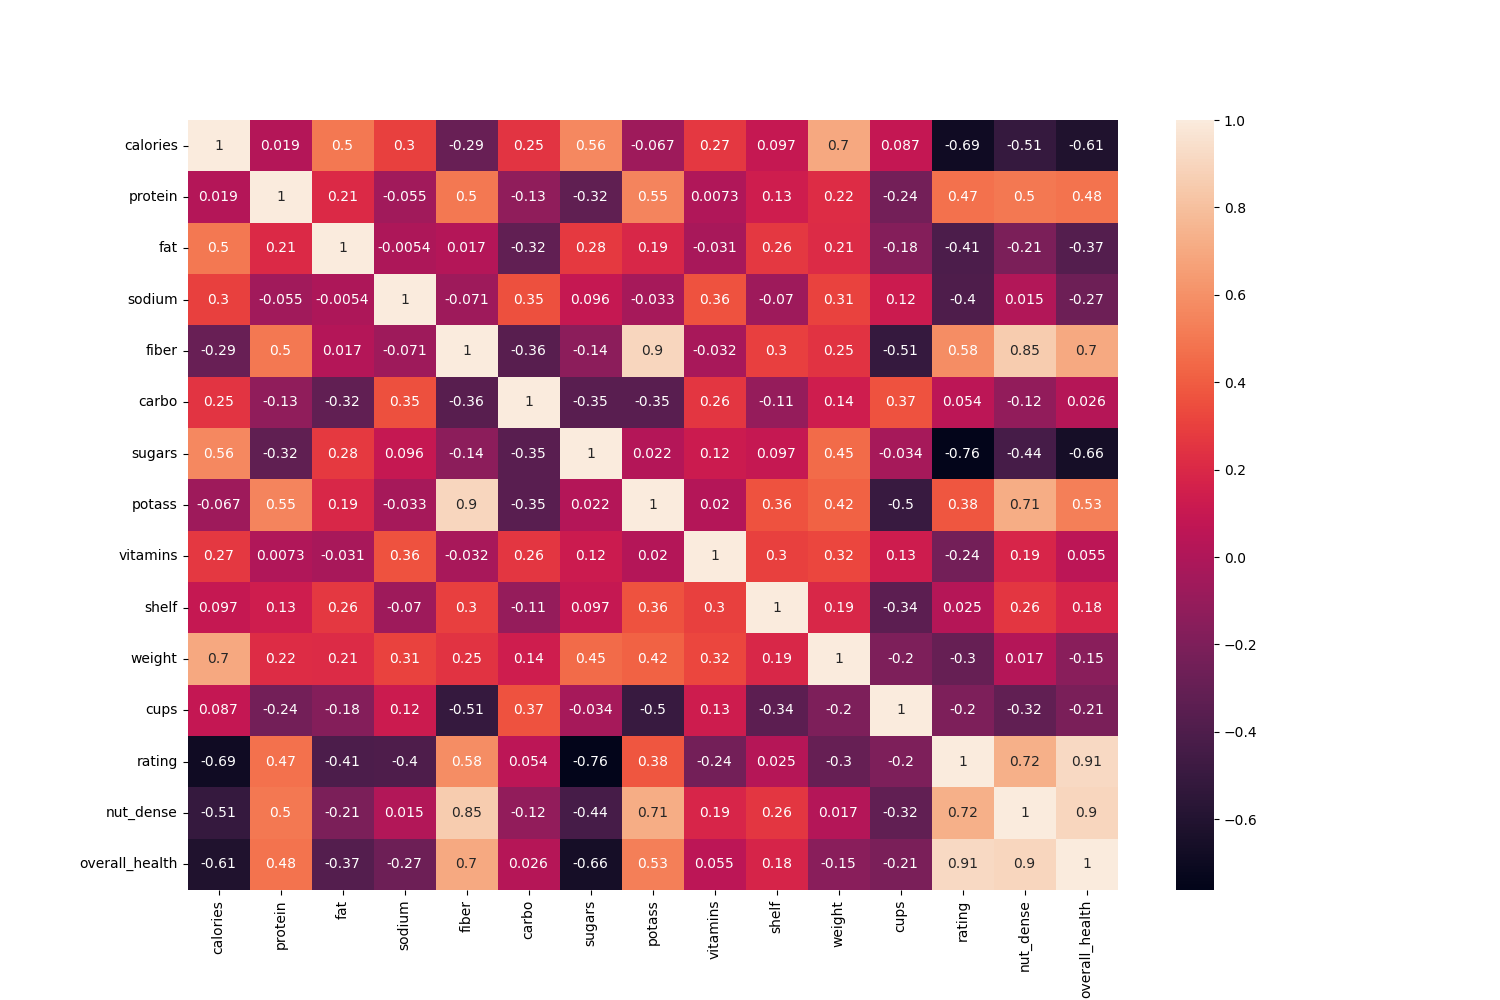

In [16]:
plt.figure(figsize=(15,10))
corrMatrix = cereal_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [17]:
print("The P-value when comparing rating and overall_health is: " + str(scipy.stats.linregress(cereal_data['rating'], cereal_data['overall_health']).pvalue))

The P-value when comparing rating and overall_health is: 3.0295970100345303e-31


# Conclusion
From the correlation graph above, we can see that a cereals rating has the highest correlation with my own nut_dense field, which is meant to represent how nutrient dense a cereal is by looking at all nutrients as a whole. The correlation between the two fields suggests a relation between the two, so we can say that higher ratings are related to higher nutrient density. After also taking into account sugar, sodium, and fat levels in overall_health, which builds off of nut_dense, the correlation jumps even higher to .915. We can also see from above that the p-value between my own metric and rating is far underneath .01, which means it's safe to assume that the ratings of the cereals represent how healthy they are.

From the data provided by Kaggle, I was able to figure out which cereals were the most nutrient dense, while also being free of unhealthy elements such as sugar and sodium. The five that I would recommend are:

3 -> All-Bran with Extra Fiber

64 -> Shredded Wheat 'n'Bran

65 -> Shredded Wheat spoon size

0 -> 100% Bran

2 -> All-Bran

Although, you can't go wrong with anything over a rating of 50

From the figures below, we can see that the recommended cereals are all low in sugars, fats, and sodium, which should all be limited according to the aforementioned government dietary guidelines.

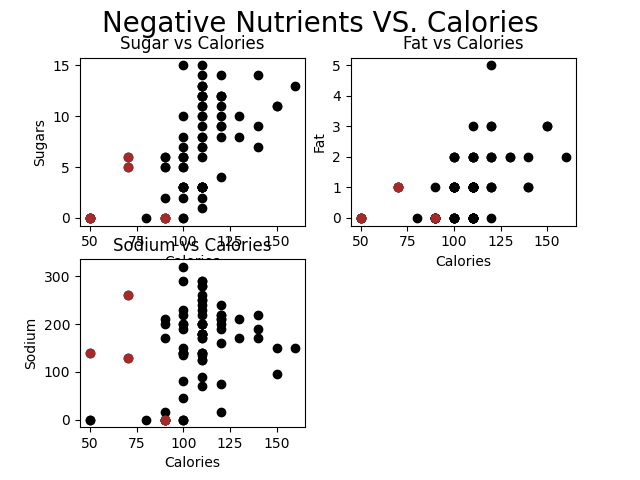

In [21]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]

fig.suptitle('Negative Nutrients VS. Calories', fontsize=20, color="black")

ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'sugars', data= cereal_data, c="black")
ax1.scatter('calories', 'sugars', data= recommendations, c="brown")
ax1.set_title('Sugar vs Calories')
ax1.set_xlabel('Calories')
ax1.set_ylabel('Sugars')


ax2 = fig.add_subplot(222)
ax2.scatter('calories', 'fat', data=cereal_data, c="black")
ax2.scatter('calories', 'fat', data= recommendations, c="brown")
ax2.set_title('Fat vs Calories')
ax2.set_xlabel('Calories')
ax2.set_ylabel('Fat')


ax3 = fig.add_subplot(223)
ax3.scatter('calories', 'sodium', data=cereal_data, c="black")
ax3.scatter('calories', 'sodium', data= recommendations, c="brown")
ax3.set_title('Sodium vs Calories')
ax3.set_xlabel('Calories')
ax3.set_ylabel('Sodium')


#ax4 = fig.add_subplot(224)
#ax4.scatter('carbo', 'calories', data=cereal_data, c="black")
#ax4.scatter('carbo', 'calories', data= recommendations, c="blue")
#ax4.set_title("Carbs", fontdict=fontdict, color="blue")

plt.show()

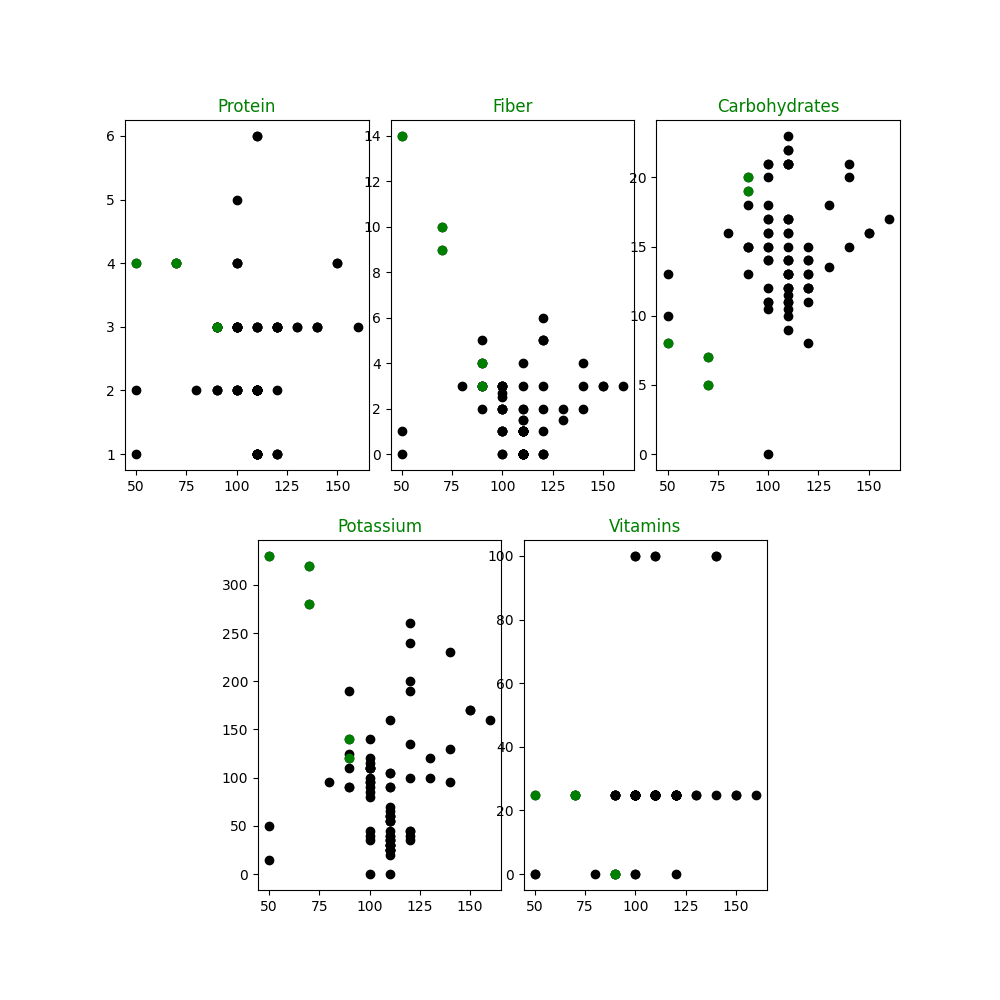

In [25]:
fig2 = plt.figure()

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.scatter('calories', 'protein', data=cereal_data, c="black")
ax1.scatter('calories', 'protein', data= recommendations, c="green")
ax1.set_title('Protein', color="green")

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.scatter('calories', 'fiber', data=cereal_data, c="black")
ax2.scatter('calories', 'fiber',  data= recommendations, c="green")
ax2.set_title('Fiber',  color="green")

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.scatter('calories', 'carbo',  data=cereal_data, c="black")
ax3.scatter('calories', 'carbo', data= recommendations, c="green")
ax3.set_title('Carbohydrates',  color="green")

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.scatter('calories', 'potass', data=cereal_data, c="black")
ax4.scatter('calories', 'potass', data= recommendations, c="green")
ax4.set_title('Potassium', color="green")

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.scatter('calories', 'vitamins', data=cereal_data, c="black")
ax5.scatter('calories', 'vitamins', data= recommendations, c="green")
ax5.set_title('Vitamins', color="green")

plt.show()

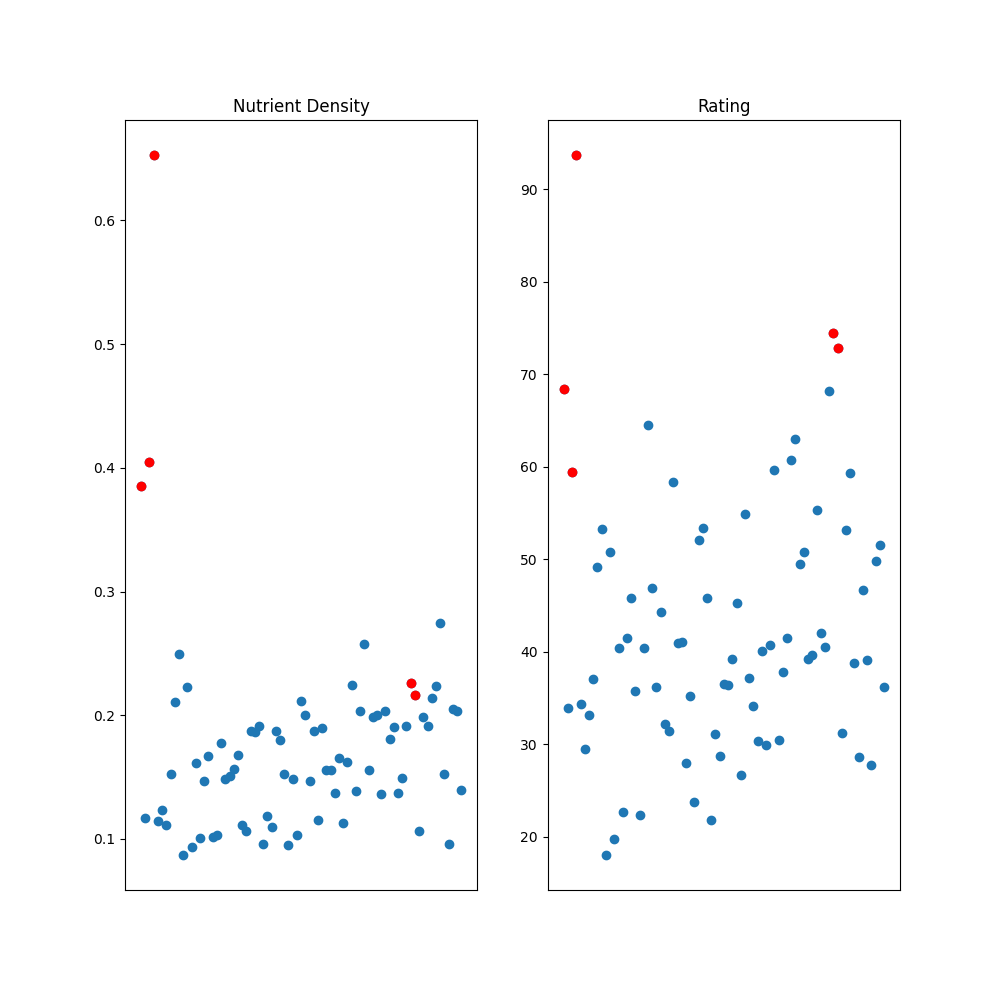

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(cereal_data['name'], cereal_data['nut_dense'])
ax1.scatter(recommendations['name'], recommendations['nut_dense'], color = 'red')
ax1.set_xticks([])
ax1.set_title('Nutrient Density')

ax2.scatter(cereal_data['name'], cereal_data['rating'])
ax2.scatter(recommendations['name'], recommendations['rating'], color = 'red')
ax2.set_xticks([])
ax2.set_title('Rating')
plt.show()

From the scatter plots above, we can see that the recommendations I've made follow the general guidelines of being nutrient dense while cutting back on fats, sugars and sodium. They also happen to be among the highest rated cereals.